### Student Performance Indicator

#### Life-Cycle of a ML project
* Understanding the problem statement
* Data Collection
* Data Checks to Perform
* EDA
* Data Pre-Processing
* Model Training
* Choose best Model

1) Problem Statement
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
* The data consists of 8 column and 1000 rows.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

#### Dataset information
* gender : sex of students -> (Male/female)
* race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
* parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
* lunch : having lunch before test (standard or free/reduced)
* test preparation course : complete or not complete before test
* math score
* reading score
* writing score

#### Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

In [4]:
## check missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
## check for duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# Remove duplicates from the DataFrame
df = df.drop_duplicates()

# Optionally, reset the index after removing duplicates
df.reset_index(drop=True, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
for feature in df.columns:
    if df[feature].dtype=='object':
        print(f"{feature} : {df[feature].nunique()} unique values")
        print(f"Values are {df[feature].unique()}")
        print("\n")

gender : 2 unique values
Values are ['female' 'male']


race/ethnicity : 5 unique values
Values are ['group B' 'group C' 'group A' 'group D' 'group E']


parental level of education : 6 unique values
Values are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


lunch : 2 unique values
Values are ['standard' 'free/reduced']


test preparation course : 2 unique values
Values are ['none' 'completed']




In [11]:
## method 2
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
# Insight
# From above description of numerical data, all means are very close to each other - between 66 and 68.05;
# All standard deviations are also close - between 14.6 and 15.19;
# While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading yet higher = 17

In [16]:
numeric_features = df.select_dtypes(exclude='object').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.to_list()
print(f"Numeric features: {numeric_features}")
print(f"Categorical features: {categorical_features}")

Numeric features: ['math score', 'reading score', 'writing score']
Categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [17]:
## Adding columns for total score and average score
df['total_score'] = df['writing score'] + df['math score'] + df['reading score']
df['average_score'] = df['total_score'] / 3

In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [19]:
reading_full = df[df['reading score'] == 100]['average_score'].count()
writing_full = df[df['writing score'] == 100]['average_score'].count()
math_full = df[df['math score'] == 100]['average_score'].count()
print(f"Number of students with full score in reading: {reading_full}")
print(f"Number of students with full score in writing: {writing_full}")
print(f"Number of students with full score in math: {math_full}")

Number of students with full score in reading: 17
Number of students with full score in writing: 14
Number of students with full score in math: 7


In [20]:
reading_worst = df[df['reading score'] <= 20]['average_score'].count()
writing_worst = df[df['writing score'] <= 20]['average_score'].count()
math_worst = df[df['math score'] <= 20]['average_score'].count()
print(f"Number of students with worst score in reading: {reading_worst}")
print(f"Number of students with worst score in writing: {writing_worst}")
print(f"Number of students with worst score in math: {math_worst}")

Number of students with worst score in reading: 1
Number of students with worst score in writing: 3
Number of students with worst score in math: 4


In [21]:
## Data Visualization

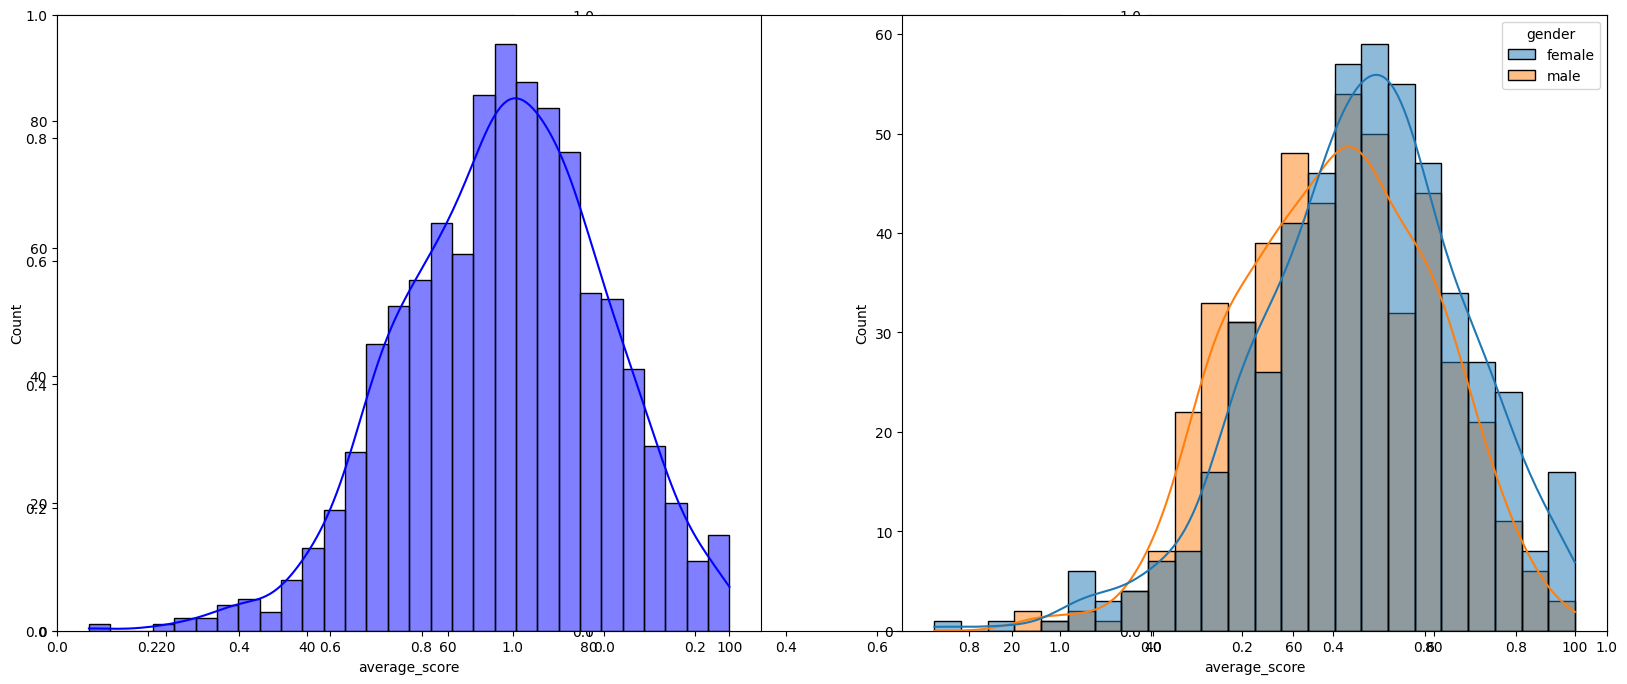

In [ ]:
## Histogram and KDE
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30,kde=True, color='blue')
plt.subplot(122)
sns.histplot(data=df, x='average_score', kde=True, color='blue', hue='gender')
plt.show()

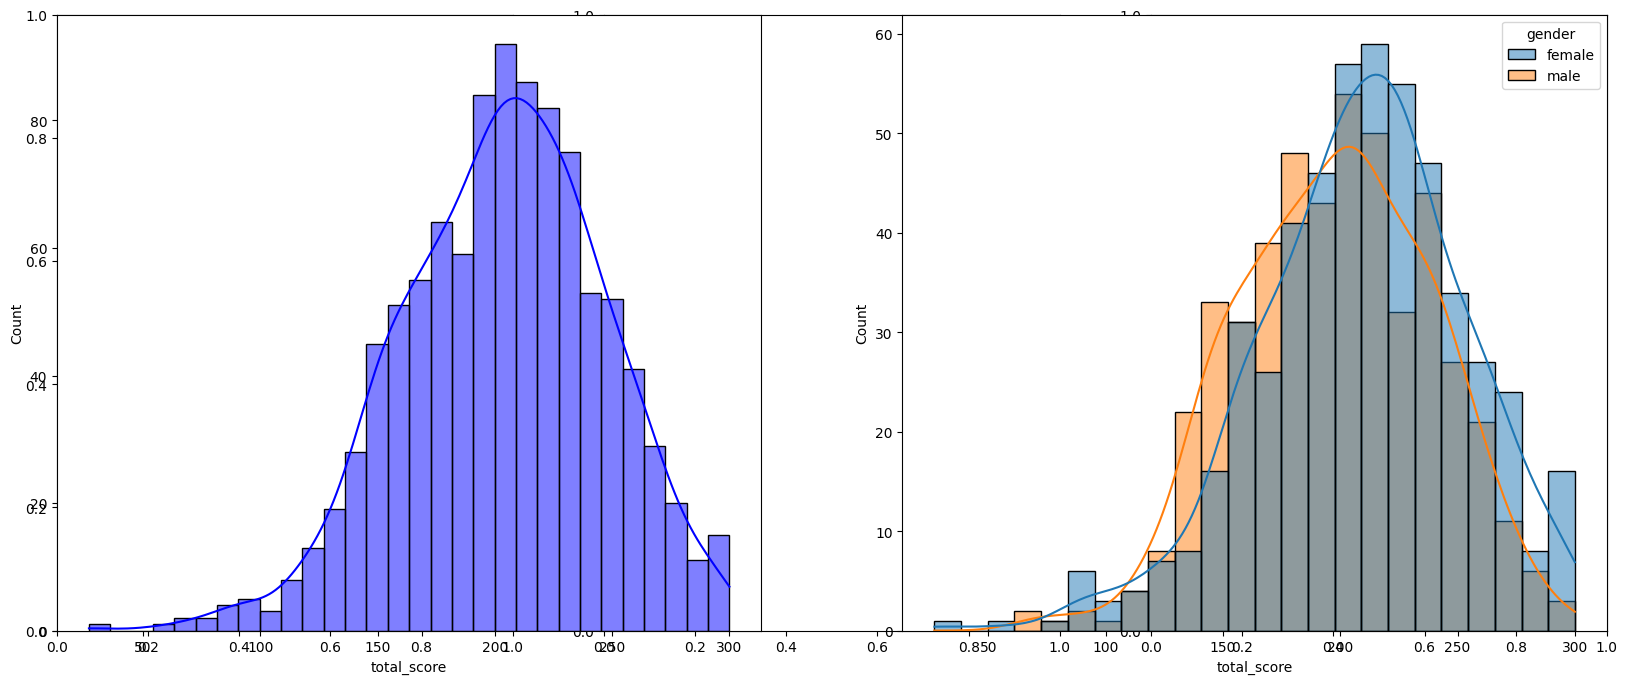

In [29]:
## Histogram and KDE
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30,kde=True, color='blue')
plt.xticks
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, color='blue', hue='gender')
plt.show()

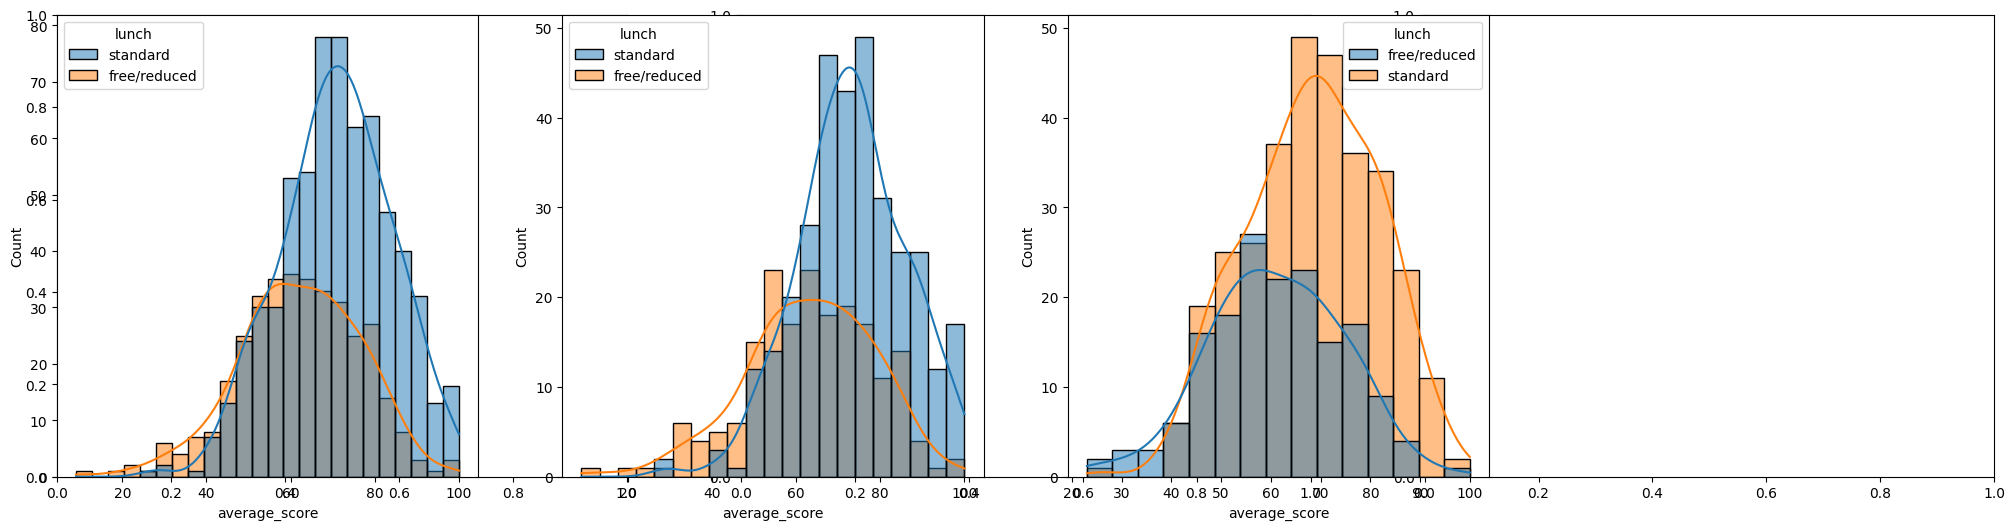

In [31]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()